# Outliers 

## example of outlier test using modified Thompson technique


In [1]:
%pylab inline
import matplotlib as mpl
mpl.rcParams['lines.linewidth']=2
mpl.rcParams['lines.color']='r'
mpl.rcParams['figure.figsize']=(8,6)
mpl.rcParams['font.size']=14
mpl.rcParams['axes.labelsize']=20

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


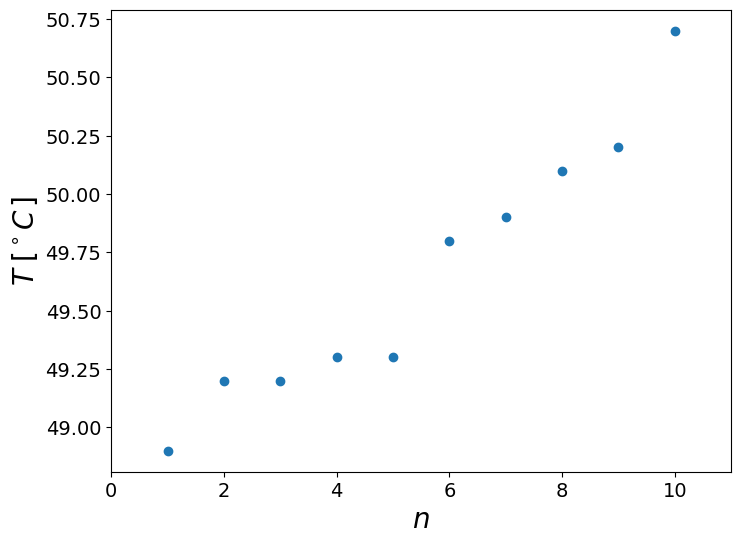

In [2]:
x = array([48.9, 49.2, 49.2, 49.3, 49.3, 49.8, 49.9, 50.1, 50.2, 50.7])
plot(arange(1,11),x,'o'),xlim([0,11]),xlabel('$n$'),ylabel('$T\; [^\circ C \,]$');

### is there an outlier? 
Sort, look at the lowest and largest and plot to visualize 

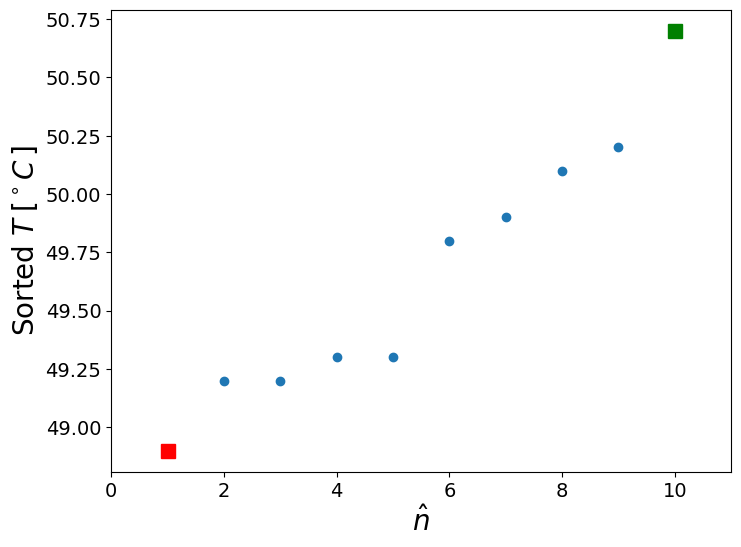

In [3]:
plot(arange(2,10),x[1:-1],'o'), plot(1,x[0],'rs',markersize=10,linewidth=2),plot(10,x[-1],'gs',markersize=10)
xlim([0,11])
xlabel('$\hat{n}$'),ylabel('Sorted $T\; [^\circ C \,]$');

### The sample mean and standard deviation, $\bar{x}$, $S_x$

In [4]:
meanx = mean(x)
stdx = std(x,ddof=1)
print('mean = %6.2f,  std = %6.2f' % (meanx,stdx))

mean =  49.66,  std =   0.57


### Defivations for each suspicious point, take the largest $\delta_i = |x_i - \bar{x}|$

In [5]:
delta = abs(x - meanx)
print ('suspicious points are first and last:')
print ('%4.3f %4.3f' % (delta[0],delta[-1]))
print ('suspicious point is:',  argmax(delta), 'deviation is = %4.3f' % max(delta))

suspicious points are first and last:
0.760 1.040
suspicious point is: 9 deviation is = 1.040


## Modified Thompson technique, $\tau$

Define the confidence level (95%), therefore $\alpha = 5\%$. Because we deal with outliers, the DOF is smaller:

$$ \tau = \frac{t_{\alpha/2} (n-1)}{\sqrt{n} \sqrt{n-2+t_{\alpha/2}^2}}, \qquad \alpha = 0.05, \quad df = n - 2 $$

if: 

$$\delta_i  > \tau S$$ 

then the point is an **outlier**

remove it, estimate **new** $\bar{x}, S, \delta_i$ and **repeat** the test. until there is no outlier in the set.

In [6]:
from scipy.stats import t


n = len(x)
tv =  t.isf(0.05/2,n-2)
tau = tv*(n-1)/(sqrt(n)*sqrt(n-2+tv**2))

print ('n = %d, t = %6.4f, tau = %6.4f' % (n,tv,tau))

print ('compare: %6.3f vs. %6.3f ' % (max(delta), tau*stdx))
print ('Is max() above $t_{\\nu,95}S$? %s ' % (max(delta) > tau*stdx))


n = 10, t = 2.3060, tau = 1.7984
compare:  1.040 vs.  1.022 
Is max() above $t_{\nu,95}S$? True 


### So we remove the outlier and repeat the test (from the beginning)

In [7]:
# new data is one point less
xnew = x[:-1].copy()
meanx = mean(xnew)
stdx = std(xnew,ddof=1)
print ('x: ', xnew)
print ('mean = %6.2f,  std = %6.2f\n' % (meanx,stdx))

# new deviations
delta = abs(xnew - meanx)
print('deviations: ',delta)
print('\n')
print ('suspicious point is: %f, its deviation is = %f \n' %( argmax(delta), max(delta)))
# new \tau test
n = len(xnew)
tv =  t.isf(0.05/2,n-2)
tau = tv*(n-1)/(sqrt(n)*sqrt(n-2+tv**2))

print ('n = %d, t = %6.4f, tau = %6.4f\n' % (n,tv,tau))

print ('compare: %6.3f vs. %6.3f \n' % (max(delta), tau*stdx))
print('Is it outlier? :', max(delta) > tau*stdx)

x:  [48.9 49.2 49.2 49.3 49.3 49.8 49.9 50.1 50.2]
mean =  49.54,  std =   0.46

deviations:  [0.64444444 0.34444444 0.34444444 0.24444444 0.24444444 0.25555556
 0.35555556 0.55555556 0.65555556]


suspicious point is: 8.000000, its deviation is = 0.655556 

n = 9, t = 2.3646, tau = 1.7770

compare:  0.656 vs.  0.820 

Is it outlier? : False
